# Clinical Drug Trials

Romaisa Nadeem

## Introduction

Each year, new drugs are approved based on evaluations of their safety
and effectiveness through clinical trials. Recently, there has been
growing public interest in ensuring fair representation of various
subgroups, such as women and racial minorities, in these trials. To
address concerns about transparency and representation, the FDA has
published Drug Trials Snapshot Summary Report (2015 and 2016) (2017) and
the Drugs Trials Snapshots (2023).

I will be exploring two datasets: Clinical Trials: Participant
Demographics Dataset (2018) and the Drug Trials Snapshots (2023)
dataset.

## About the Dataset

### Clinical Trials: Participant Demographics Dataset

The Clinical Trials: Participant Demographic Data dataset covers
demographic details for participants in clinical trials for FDA approved
drugs between January 2015 and mid August 2018.

The columns include:

-   **Brand Name**: The commercial name of each drug in the clinical
    trials.

-   **Drug Indication**: The medical condition the drug is intended to
    treat.

-   **Percentage of Women**: The proportion of women participants in
    each trial.

-   **Percentage by Race**: Breakdown of participants by race,
    including:

    -   **White**
    -   **Black or African American**
    -   **Asian**
    -   **Other**: This category aggregates other races, including
        American Indian/Alaska Native, Native Hawaiian/Other Pacific
        Islander, mixed races, unknown, and unreported.

-   **Percentage of Hispanic Ethnicity**: The percentage of Hispanic
    participants, although this category wasn’t included in summary
    reports for 2015 and 2016.

-   **Percentage Age 65+**: The proportion of trial participants aged 65
    and older.

-   **Year**: The year the data was recorded or the drug was approved.

-   The “other rate” column encompasses of any of the following:
    American Indian/Alaska Native (AI/AN), Native Hawaiian or Other
    Pacific Islander (NH/OPI), mixed race, multiple races, Unknown,
    Unreported, and Other.

For drugs approved in 2015 and 2016, percentages for the “Other”
category were provided in FDA summary reports. For drugs approved in
2017, ProPublica calculated this percentage by subtracting the sum of
other categories from 100 percent. For 2018, ProPublica manually
compiled this information for each individual drug.

The categories “Hispanic” and “United States ethnicity” were not
included in the FDA’s yearly summary reports for 2015 and 2016, although
they sometimes appear in individual drug reports. This category includes
one of the following labels: Hispanic, Not Hispanic, and
Unknown/Unreported.

### Drug Trials Snapshot Dataset

This dataset is a record of drug trial snapshots from the FDA, covering
details about each drug, including its approval information and intended
use.

The columns include:

-   **Brand Name (Drug Trials Snapshot)**: Lists the brand names of
    drugs that have undergone clinical trials.

-   **Drug Name**: The chemical or generic name of each drug.

-   **Original Date of FDA Approval**: The date when the drug received
    its first FDA approval.

-   **FDA Approved Use on Original Approval Date**: Describes the
    specific medical condition or purpose for which the drug was
    approved by the FDA initially.

-   **Brand Name (Prescribing Information)**: Another brand name column,
    possibly reflecting the name used in prescribing information.

## Questions

In this project, I intend to explore gender and racial biases in
clinical drug trials.

I will do show by exploring the following questions:

-   **Are there any potential biases in clinical trials based on age,
    gender or race?**

-   **Which demographic groups receive the greatest benefit from the
    drugs being tested in clinical trials?**

While these questions are interesting, they also have very important
medical and societal implications. Addressing these biases is essential
for promoting equality in healthcare, as unrecognized biases in clinical
trials may lead to significant disparities in treatment outcomes,
sometimes with severe consequences for patient health and safety.
Ensuring fair representation in clinical trials is a step toward more
equitable and effective medical treatments for all groups.

## Clinical Trials: Participant Demographics Dataset

## Iteration 1

### Phase 1

1.  Read the csv file into R
    -   Specify column types
2.  Make the column names lowercase
3.  Drop Hispanic and USA columns
    -   Pivot race columns to longer
4.  Pivot Age columns to longer
5.  Identify UIDs
    -   Sort tibble by UID
6.  Display final tibble

### Phase 2

In [ ]:
# 1. Read in the 1st CSV file. 
clinical_data <- read_csv("./clinical_trials_data.csv",
col_types = "cccccccccccccc",
na = c("N/A", "NR", "Not reported")
)
clinical_data %>%
glimpse()

Rows: 155
Columns: 14
$ `BRAND NAME`                                                                                                                                <chr> …
$ INDICATION                                                                                                                                  <chr> …
$ WOMEN                                                                                                                                       <chr> …
$ WHITE                                                                                                                                       <chr> …
$ `BLACK OR AFRICAN AMERICAN`                                                                                                                 <chr> …
$ ASIAN                                                                                                                                       <chr> …
$ `ALL OTHER (Aggregated):\nAmerican Indian or Alaska Native (AI/AN), Native H

In [ ]:
# 2. Make column names lowercase
clinical_data %<>% rename_with(tolower)

In [ ]:
# 3.Dropping Hispanic and USA data from 2017 and later
clinical_data %<>%
mutate(`hispanic or latino (2017 and later only)` = NULL, `united states (2017 only)` = NULL)

# Pivot race
clinical_data %<>%
pivot_longer(!c(women, `brand name`, indication, year, notes, `age
65 and older`, `age
75 and older`, `age
80 and older`), names_to = "race", values_to = "percent race")

The Hispanic and USA columns are being dropped because they are missing
values for more than 50% of the dataset.

In [ ]:
# 4. Pivot age
clinical_data %<>%
pivot_longer(!c(
  women, `brand name`, indication, year, notes, race,
`percent race`
), names_to = "age", values_to = "percent age")

In [ ]:
clinical_data %>%
glimpse()

Rows: 1,860
Columns: 9
$ `brand name`   <chr> "ADDYI", "ADDYI", "ADDYI", "ADDYI", "ADDYI", "ADDYI", "…
$ indication     <chr> "Treatment of acquired, generalized hypoactive sexual d…
$ women          <chr> "100%", "100%", "100%", "100%", "100%", "100%", "100%",…
$ year           <chr> "2015", "2015", "2015", "2015", "2015", "2015", "2015",…
$ notes          <chr> "", "", "", "", "", "", "", "", "", "", "", "", "", "",…
$ race           <chr> "white", "white", "white", "black or african american",…
$ `percent race` <chr> "89%", "89%", "89%", "8%", "8%", "8%", "1%", "1%", "1%"…
$ age            <chr> "age\n65 and older", "age\n75 and older", "age\n80 and …
$ `percent age`  <chr> "0%", "0%", "0%", "0%", "0%", "0%", "0%", "0%", "0%", "…

In [ ]:
# 5. Identify UID
clinical_data %>%
count(`brand name`, indication, year, race, age) %>%
filter(n > 1) %>%
dim_desc()

[1] "[0 x 6]"

Looks like a good UID.

In [ ]:
# Sort tibble by uid
clinical_data %<>% arrange(`brand name`, indication, year, race, age)

clinical_data %>% glimpse()

Rows: 1,860
Columns: 9
$ `brand name`   <chr> "ADDYI", "ADDYI", "ADDYI", "ADDYI", "ADDYI", "ADDYI", "…
$ indication     <chr> "Treatment of acquired, generalized hypoactive sexual d…
$ women          <chr> "100%", "100%", "100%", "100%", "100%", "100%", "100%",…
$ year           <chr> "2015", "2015", "2015", "2015", "2015", "2015", "2015",…
$ notes          <chr> "", "", "", "", "", "", "", "", "", "", "", "", "", "",…
$ race           <chr> "all other (aggregated):\namerican indian or alaska nat…
$ `percent race` <chr> "2%", "2%", "2%", "1%", "1%", "1%", "8%", "8%", "8%", "…
$ age            <chr> "age\n65 and older", "age\n75 and older", "age\n80 and …
$ `percent age`  <chr> "0%", "0%", "0%", "0%", "0%", "0%", "0%", "0%", "0%", "…

In [ ]:
# 6. Final tibble
clinical_data %>%
  select(`brand name`, women, year, `percent age`, `percent race`) %>%
  slice_sample(n = 5) %>% 
  kable()

## Clinical Trials: Participant Demographics Dataset

## Iteration 2

### Phase 1

1.  Drop notes column
2.  Convert columns to correct data types
    -   year to date type
    -   brand name to factor
    -   race to factor (after renaming “other” values)
    -   age to factor (after renaming “age” values)
3.  Standardize indication column
    -   remove filler words
    -   keep key words and disease names
4.  Remove “%” and “\<” symbols
5.  Convert percentages to numerics
6.  Drop NAs
7.  Display final tibble

### Phase 2

In [ ]:
# 1. Dropping notes column
clinical_data %<>%
mutate(notes = NULL)

In [ ]:
# 2. Converting data types
clinical_data %<>% 
  # Convert year column to date
  mutate(
    year = make_date(year = year),
    # Convert brand name column to factor
    `brand name` = as_factor(`brand name`),
    # Shorten "all other" data in race column
    race = if_else(str_detect(race, "^all"), "other", race), 
    # Shorten "black or african america" data in race column
    race = if_else(str_detect(race, "^black"), "black", race), 
    # Convert race to factor
    race = as_factor(race)
  )

clinical_data %>%
  glimpse()

Rows: 1,860
Columns: 8
$ `brand name`   <fct> ADDYI, ADDYI, ADDYI, ADDYI, ADDYI, ADDYI, ADDYI, ADDYI,…
$ indication     <chr> "Treatment of acquired, generalized hypoactive sexual d…
$ women          <chr> "100%", "100%", "100%", "100%", "100%", "100%", "100%",…
$ year           <date> 2015-01-01, 2015-01-01, 2015-01-01, 2015-01-01, 2015-0…
$ race           <fct> other, other, other, asian, asian, asian, black, black,…
$ `percent race` <chr> "2%", "2%", "2%", "1%", "1%", "1%", "8%", "8%", "8%", "…
$ age            <chr> "age\n65 and older", "age\n75 and older", "age\n80 and …
$ `percent age`  <chr> "0%", "0%", "0%", "0%", "0%", "0%", "0%", "0%", "0%", "…

In [ ]:
# 2. Continued... Shorten age data and convert to factor
clinical_data %<>%
mutate(
age = case_when(
age == "age\n65 and older" ~ "65 to 74",
age == "age\n75 and older" ~ "75 to 79",
age == "age\n80 and older" ~ "80 and up",
TRUE ~ age
),
age = as_factor(age)
)

clinical_data %>%
glimpse()

Rows: 1,860
Columns: 8
$ `brand name`   <fct> ADDYI, ADDYI, ADDYI, ADDYI, ADDYI, ADDYI, ADDYI, ADDYI,…
$ indication     <chr> "Treatment of acquired, generalized hypoactive sexual d…
$ women          <chr> "100%", "100%", "100%", "100%", "100%", "100%", "100%",…
$ year           <date> 2015-01-01, 2015-01-01, 2015-01-01, 2015-01-01, 2015-0…
$ race           <fct> other, other, other, asian, asian, asian, black, black,…
$ `percent race` <chr> "2%", "2%", "2%", "1%", "1%", "1%", "8%", "8%", "8%", "…
$ age            <fct> 65 to 74, 75 to 79, 80 and up, 65 to 74, 75 to 79, 80 a…
$ `percent age`  <chr> "0%", "0%", "0%", "0%", "0%", "0%", "0%", "0%", "0%", "…

In [ ]:
# 3: Standardize indication column, keeping key words
clinical_data <- clinical_data %>%
  mutate(
    indication = case_when(
      str_detect(indication, "[Tt]reatment") ~
        if_else(str_detect(indication, "\\([ˆ()]+\\)"),
                str_c("treatment, ", str_extract(indication, "\\([ˆ()]+\\)")),
                str_to_lower(indication)),
      str_detect(indication, "[Pp]revent") ~
        if_else(str_detect(indication, "\\([ˆ()]+\\)"),
                str_c("preventative treatment, ", str_extract(indication, "\\([ˆ()]+\\)")),
                str_to_lower(indication)),
      TRUE ~ indication
    ),
    # Removing filler words and keeping disease names
    indication = if_else(str_detect(indication, "[Ff]or"), str_remove_all(indication, "[Ff]or"), indication),
    indication = if_else(str_detect(indication, "\\."), str_remove(indication, "\\.$"), indication),
    indication = if_else(str_detect(indication, "associated with"), str_remove_all(indication, "associated with "), indication),
    indication = if_else(str_detect(indication, "adults who"), str_remove_all(indication, "(, adults who).*"), indication),
    indication = if_else(str_detect(indication, "patients two"), str_remove_all(indication, "(, patients two).*"), indication)
  )

# 4: Removing "%" and "<" symbols and converting to numeric
clinical_data <- clinical_data %>%
  mutate(
    women = as.numeric(str_remove_all(women, "[%<]")),
    `percent race` = as.numeric(str_remove_all(`percent race`, "[%<]")),
    `percent age` = as.numeric(str_remove_all(`percent age`, "[%<]"))
  )


clinical_data %>%
glimpse()

Rows: 1,860
Columns: 8
$ `brand name`   <fct> ADDYI, ADDYI, ADDYI, ADDYI, ADDYI, ADDYI, ADDYI, ADDYI,…
$ indication     <chr> "treatment of acquired, generalized hypoactive sexual d…
$ women          <dbl> 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, …
$ year           <date> 2015-01-01, 2015-01-01, 2015-01-01, 2015-01-01, 2015-0…
$ race           <fct> other, other, other, asian, asian, asian, black, black,…
$ `percent race` <dbl> 2, 2, 2, 1, 1, 1, 8, 8, 8, 89, 89, 89, 2, 2, 2, 32, 32,…
$ age            <fct> 65 to 74, 75 to 79, 80 and up, 65 to 74, 75 to 79, 80 a…
$ `percent age`  <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 19, NA, NA, 19, NA,…

In [ ]:
# Check percentages
temp <- clinical_data %>%
pivot_wider(names_from = race, values_from = `percent race`) %>%
rowwise() %>%
mutate(total_percent = sum(c(other, asian, black, white))) %>%
ungroup()
temp %>%
select(`brand name`, other, asian, black, white, total_percent) %>%
filter(total_percent != 100)

# A tibble: 99 × 6
   `brand name` other asian black white total_percent
   <fct>        <dbl> <dbl> <dbl> <dbl>         <dbl>
 1 ADLYXIN§         2    32     3    64           101
 2 ADLYXIN§         2    32     3    64           101
 3 ADLYXIN§         2    32     3    64           101
 4 AKYNZEO          1     1     1   100           103
 5 AKYNZEO          1     1     1   100           103
 6 AKYNZEO          1     1     1   100           103
 7 ALECENSA         7    18     2    74           101
 8 ALECENSA         7    18     2    74           101
 9 ALECENSA         7    18     2    74           101
10 ARISTADA         1    13    40    47           101
# ℹ 89 more rows

As seen above, the sum of the race columns does not add up exactly a
100%. This may be due to a error in data collection.

I will leave the data as it is.

In [ ]:
# 5. Check summary
clinical_data %>%
summary()

    brand name    indication            women             year           
 AVYCAZ  :  24   Length:1860        Min.   :  0.00   Min.   :2015-01-01  
 CHOLBAM :  24   Class :character   1st Qu.: 37.00   1st Qu.:2015-01-01  
 CRESEMBA:  24   Mode  :character   Median : 44.00   Median :2016-01-01  
 REXULTI :  24                      Mean   : 47.96   Mean   :2016-04-21  
 RYDAPT  :  24                      3rd Qu.: 59.00   3rd Qu.:2017-01-01  
 SAVAYSA :  24                      Max.   :100.00   Max.   :2018-01-01  
 (Other) :1716                                                           
    race      percent race           age       percent age   
 other:465   Min.   :  0.00   65 to 74 :620   Min.   : 0.00  
 asian:465   1st Qu.:  2.00   75 to 79 :620   1st Qu.: 1.00  
 black:465   Median :  7.00   80 and up:620   Median : 7.00  
 white:465   Mean   : 25.20                   Mean   :16.92  
             3rd Qu.: 46.25                   3rd Qu.:29.00  
             Max.   :100.00         

In [ ]:
# 5. Drop NAs
clinical_data %<>%
drop_na()

clinical_data %>%
glimpse()

Rows: 995
Columns: 8
$ `brand name`   <fct> ADDYI, ADDYI, ADDYI, ADDYI, ADDYI, ADDYI, ADDYI, ADDYI,…
$ indication     <chr> "treatment of acquired, generalized hypoactive sexual d…
$ women          <dbl> 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, …
$ year           <date> 2015-01-01, 2015-01-01, 2015-01-01, 2015-01-01, 2015-0…
$ race           <fct> other, other, other, asian, asian, asian, black, black,…
$ `percent race` <dbl> 2, 2, 2, 1, 1, 1, 8, 8, 8, 89, 89, 89, 2, 32, 3, 64, 8,…
$ age            <fct> 65 to 74, 75 to 79, 80 and up, 65 to 74, 75 to 79, 80 a…
$ `percent age`  <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 19, 19, 19, 19, 34,…

There are no outliers in the data, and 865 rows were dropped.

In [ ]:
# 7. Display final tibble 
clinical_data %>%
slice_sample(n = 5) %>%
kable()

## Drug Trials Snapshots Dataset

## Iteration 3

### Phase 1

1.  Read the csv file into R
    -   Skip first column
2.  Change column names to lower
3.  Drop brand name prescribing information column
4.  Identify UID
    -   Sort tibble by UID
5.  Display final tibble

### Phase 2

In [ ]:
# 1. Read csv
drug_snapshots <- read_csv("./drug_trials_snapshot_fda.csv", skip = 1, show_col_types = FALSE)

drug_snapshots %>% 
  glimpse()

Rows: 447
Columns: 5
$ `Brand Name (Drug Trials Snapshot)`           <chr> "NEMLUVIO", "YORVIPATH",…
$ `Drug Name`                                   <chr> "nemolizumab-ilto", "pal…
$ `Original Date of FDA Approval`               <chr> "August 12, 2024", "Augu…
$ `FDA Approved Use on Original Approval Date*` <chr> "To treat prurigo nodula…
$ `Brand Name (Prescribing Information)`        <chr> "Nemluvio", "Yorvipath",…

In [ ]:
# 2. Changing column names to lowercase
drug_snapshots %<>% rename_with(tolower)

drug_snapshots %>% 
  glimpse()

Rows: 447
Columns: 5
$ `brand name (drug trials snapshot)`           <chr> "NEMLUVIO", "YORVIPATH",…
$ `drug name`                                   <chr> "nemolizumab-ilto", "pal…
$ `original date of fda approval`               <chr> "August 12, 2024", "Augu…
$ `fda approved use on original approval date*` <chr> "To treat prurigo nodula…
$ `brand name (prescribing information)`        <chr> "Nemluvio", "Yorvipath",…

In [ ]:
# 3. Drop prescribing name column
drug_snapshots %<>% mutate(
`brand name (prescribing information)` = NULL
)

Dropping this column because it does not provide any useful information.

In [ ]:
# 4. Identify uid
drug_snapshots %>%
count(`original date of fda approval`, `fda approved use on original approval date*`) %>%
filter(n > 1)

# A tibble: 0 × 3
# ℹ 3 variables: original date of fda approval <chr>,
#   fda approved use on original approval date* <chr>, n <int>

Seems to be a good UID.

In [ ]:
# Sort tibble by uid
drug_snapshots %<>% arrange(`original date of fda approval`, `fda approved use on original approval date*`)

# Check structure
drug_snapshots %>% glimpse()

Rows: 447
Columns: 4
$ `brand name (drug trials snapshot)`           <chr> "KOSELUGO", "VENCLEXTA",…
$ `drug name`                                   <chr> "selumetinib", "venetocl…
$ `original date of fda approval`               <chr> "April 10,2020", "April …
$ `fda approved use on original approval date*` <chr> "For the treatment of pl…

In [ ]:
# 5. Final tibble
drug_snapshots %>%
select(`brand name (drug trials snapshot)`, `original date of fda approval`, `drug name`) %>%
slice_sample(n = 4) %>%
kable()

## Drug Trials Snapshots Dataset

## Iteration 4

### Phase 1

1.  Rename columns
2.  Convert approval to date to date type
3.  Standardize approved use column
    -   Keep key words, remove filler words and keep disease names
4.  Drop NAs
5.  Display final tibble

### Phase 2

In [ ]:
# 1. Rename columns
drug_snapshots %<>%
rename(
`approved use` = `fda approved use on original approval date*`,
`approval date` = `original date of fda approval`,
`brand name` = `brand name (drug trials snapshot)`
)
drug_snapshots %>%
glimpse()

Rows: 447
Columns: 4
$ `brand name`    <chr> "KOSELUGO", "VENCLEXTA", "INGREZZA", "BALVERSA", "CORL…
$ `drug name`     <chr> "selumetinib", "venetoclax", "valbenazine", "erdafitin…
$ `approval date` <chr> "April 10,2020", "April 11, 2016", "April 11, 2017", "…
$ `approved use`  <chr> "For the treatment of plexiform neurofibroma", "Treatm…

In [ ]:
# 2. Convert approval date to Date type
drug_snapshots %<>%
mutate(`approval date` = as.Date(`approval date`, format = "%B %d, %Y"))
drug_snapshots %>%
glimpse()

Rows: 447
Columns: 4
$ `brand name`    <chr> "KOSELUGO", "VENCLEXTA", "INGREZZA", "BALVERSA", "CORL…
$ `drug name`     <chr> "selumetinib", "venetoclax", "valbenazine", "erdafitin…
$ `approval date` <date> 2020-04-10, 2016-04-11, 2017-04-11, 2019-04-12, 2015-…
$ `approved use`  <chr> "For the treatment of plexiform neurofibroma", "Treatm…

In [ ]:
# 3. Standardize approved use column by keeping key words
drug_snapshots %<>%
  mutate(
    `approved use` = case_when(
      str_detect(`approved use`, "[Tt]reatment") ~
        if_else(
          str_detect(`approved use`, "\\([^)]+\\)"),
          str_c("treatment, ", str_extract(`approved use`, "\\([^)]+\\)")),
          str_to_lower(`approved use`)
        ),
      str_detect(`approved use`, "[Pp]revent") ~
        if_else(
          str_detect(`approved use`, "\\([^)]+\\)"),
          str_c("preventative treatment, ", str_extract(`approved use`, "\\([^)]+\\)")),
          str_to_lower(`approved use`)
        ),
      # Default case to keep `approved use` as it is
      TRUE ~ `approved use`
    )
  )

# Removing filler words and keeping disease names
drug_snapshots %<>%
  mutate(
    `approved use` = str_replace(
      `approved use`, "^[A-Z]", str_to_lower(str_sub(`approved use`, 1, 1))
    ),
    `approved use` = if_else(
      str_detect(`approved use`, "[Ff]or"),
      str_remove_all(`approved use`, "[Ff]or"),
      `approved use`
    ),
    `approved use` = if_else(
      str_detect(`approved use`, "\\."),
      str_remove(`approved use`, "\\.$"),
      `approved use`
    ),
    `approved use` = if_else(
      str_detect(`approved use`, "associated with"),
      str_remove_all(`approved use`, "associated with "),
      `approved use`
    ),
    `approved use` = if_else(
      str_detect(`approved use`, "adults who"),
      str_remove_all(`approved use`, "(?=(, adults who)).*"),
      `approved use`
    ),
    `approved use` = if_else(
      str_detect(`approved use`, "patients two"),
      str_remove_all(`approved use`, "(?=(, patients two)).*"),
      `approved use`
    ),
    # Additional cleanup: Remove leading whitespace and "the " at the start
    `approved use` = str_trim(`approved use`),
    `approved use` = str_replace(`approved use`, "^the ", "")
  )

In [ ]:
drug_snapshots %>% summary()

  brand name         drug name         approval date        approved use      
 Length:447         Length:447         Min.   :2014-05-08   Length:447        
 Class :character   Class :character   1st Qu.:2017-08-29   Class :character  
 Mode  :character   Mode  :character   Median :2019-10-21   Mode  :character  
                                       Mean   :2019-10-12                     
                                       3rd Qu.:2021-11-23                     
                                       Max.   :2024-08-14                     
                                       NA's   :2                              

In [ ]:
drug_snapshots %<>%
drop_na(., `approval date`)
drug_snapshots %>% summary()

  brand name         drug name         approval date        approved use      
 Length:445         Length:445         Min.   :2014-05-08   Length:445        
 Class :character   Class :character   1st Qu.:2017-08-29   Class :character  
 Mode  :character   Mode  :character   Median :2019-10-21   Mode  :character  
                                       Mean   :2019-10-12                     
                                       3rd Qu.:2021-11-23                     
                                       Max.   :2024-08-14                     

In [ ]:
# 5. Final tibble
drug_snapshots %>%
  slice_sample(n = 5) %>%
  kable()

## Iteration 5

### Phase 1

1\) Inner join both tibbles

2\) Display final tibble

In [ ]:
# Join tibbles
clinical_demographics <- inner_join(clinical_data, drug_snapshots, by = "brand name", relationship = "many-to-many")

clinical_demographics %>%
glimpse()

Rows: 843
Columns: 11
$ `brand name`    <chr> "ADDYI", "ADDYI", "ADDYI", "ADDYI", "ADDYI", "ADDYI", …
$ indication      <chr> "treatment of acquired, generalized hypoactive sexual …
$ women           <dbl> 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100,…
$ year            <date> 2015-01-01, 2015-01-01, 2015-01-01, 2015-01-01, 2015-…
$ race            <fct> other, other, other, asian, asian, asian, black, black…
$ `percent race`  <dbl> 2, 2, 2, 1, 1, 1, 8, 8, 8, 89, 89, 89, 1, 1, 7, 91, 1,…
$ age             <fct> 65 to 74, 75 to 79, 80 and up, 65 to 74, 75 to 79, 80 …
$ `percent age`   <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 45, 45, 45, 45, 32…
$ `drug name`     <chr> "flibanserin", "flibanserin", "flibanserin", "flibanse…
$ `approval date` <date> 2015-08-18, 2015-08-18, 2015-08-18, 2015-08-18, 2015-…
$ `approved use`  <chr> "treatment, (HSDD)", "treatment, (HSDD)", "treatment, …

For the purposes of this project, I will be focusing on the clinical
trials data to derive insights on clinical participant demographics. The
drug snapshots adds more information to the initial table.

In [ ]:
# Final tibble
clinical_demographics %>%
slice_sample(n = 3) %>%
kable()

## Results and Visualization

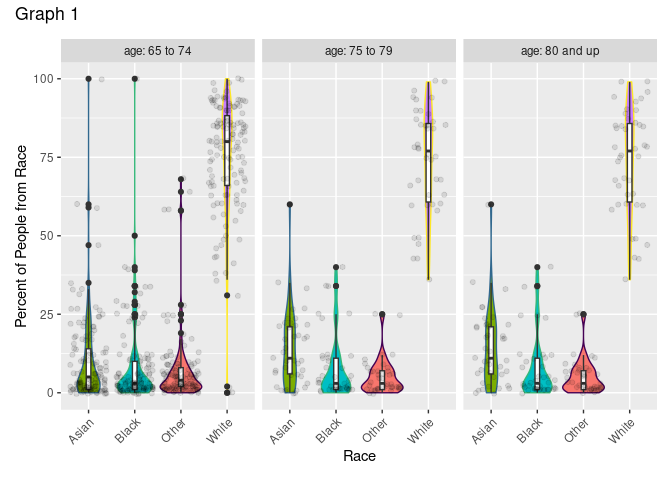

In [ ]:
p1 <- clinical_demographics %>%  
  ggplot(aes(x = str_to_title(race), y = `percent race`)) +  
  geom_violin(aes(fill = race, colour = race)) +  
  geom_boxplot(width = 0.1) +  
  geom_jitter(alpha = 0.1) +  
  labs(  
    x = "Race",   
    y = "Percent of People from Race"  
  ) +  
  scale_color_viridis_d() +  
  theme(legend.position = "none", plot.caption = element_text(hjust = 0))  

p1 + facet_wrap(. ~ age, labeller = label_both) +  
  guides(x = guide_axis(angle = 45)) +  
  plot_annotation(title = "Graph 1")

Graph 1 illustrates the distribution of clinical trial participants
across different racial groups and age categories using box and violin
plots.

### **Age Groups:**

-   **65 to 74**:

    -   The “White” category shows a wide distribution, indicating
        variability in the percentage of participants.

    -   Other racial groups like “Asian,” “Black,” and “Other” have
        narrower distributions, suggesting less variability.

-   **75 to 79**:

    -   The “White” category continues to show a wider spread, though
        less pronounced than the 65 to 74 group.

    -   Other racial groups maintain narrower distributions.

-   **80 and up**:

    -   The “White” category again shows a wider distribution,
        indicating variability.

    -   Other racial groups remain consistent with narrower spreads.

### **Racial Distribution:**

-   The majority of participants identify as “White,” with a significant
    density of points indicating a higher percentage.

-   Other racial groups have fewer participants, with distributions
    centered around the mean and fewer outliers.

### **Overall Trends:**

-   The “White” category shows more variation across age groups, not
    centered around the mean.

-   Other racial groups show less variation, with percentages more
    centered around the mean and some outliers.

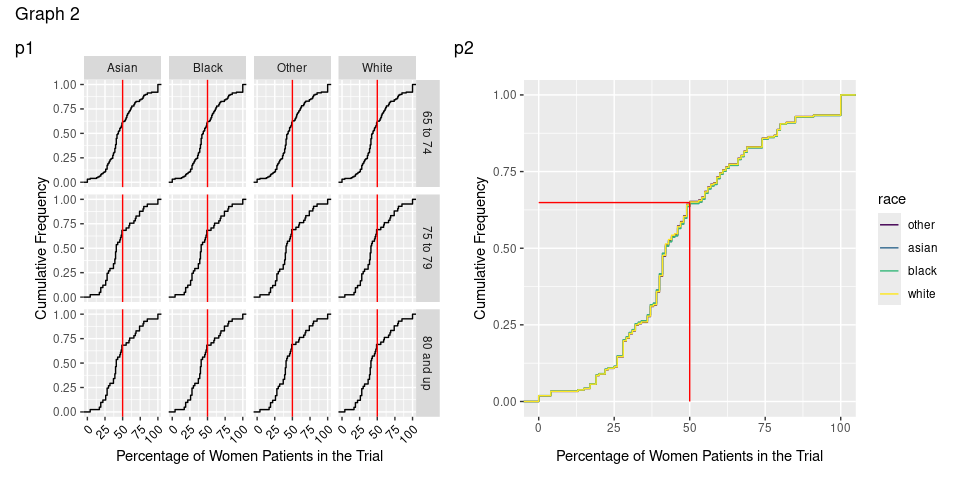

In [ ]:
p2 <- clinical_demographics %>%  
  ggplot(aes(x = women)) +  
  stat_ecdf() +  
  geom_vline(aes(xintercept = 50), colour = "red") +  
  labs(x = "Percentage of Women Patients in the Trial", y = "Cumulative Frequency") +  
  facet_grid(age ~ str_to_title(race)) +  
  guides(x = guide_axis(angle = 45)) +  
  theme(axis.text.x = element_text(color = "black"), legend.position = "none")  

p3 <- clinical_demographics %>%  
  mutate(specific_values = FALSE) %>%  
  bind_rows(data.frame(x = 50, specific_values = TRUE)) %>%  
  mutate(y = ecdf(women)(x)) %>%  
  ggplot(aes(x = women)) +  
  stat_ecdf(data = . %>% filter(!specific_values), aes(colour = race)) +  
  labs(x = "Percentage of Women Patients in the Trial", y = "Cumulative Frequency") +  
  geom_segment(data = . %>%  
    filter(specific_values), aes(y = y, x = 0, xend = x, yend = y), color = "red") +  
  geom_segment(data = . %>%  
    filter(specific_values), aes(y = 0, x = x, xend = x, yend = y), color = "red") +  
  scale_color_viridis_d()  

# Combine plots  
combined_plot <- p2 + p3 +  
  plot_annotation(  
    title = "Graph 2",   
    tag_levels = "1",   
    tag_prefix = "p"  
  ) +  
  theme(plot.caption = element_text(hjust = 1))  

# Print the combined plot  
print(combined_plot)

P1 and p2 in graph 2 provide insights into the distribution of women
participants in clinical trials, segmented by race and age groups.

### **P1:**

-   **Cumulative Frequency by Race and Age**:

    -   This panel displays cumulative frequency plots for different
        racial groups (Asian, Black, Other, White) across three age
        categories: 65 to 74, 75 to 79, and 80 and up.

    -   The overlapping distributions indicate that the percentage of
        women participants is similar across racial groups, as the
        curves for each race largely coincide.

    -   However, there is a noticeable variation in the distribution of
        women participants across age groups. Younger age groups show a
        lower frequency of trials with 50% women participants compared
        to older age groups, suggesting that older participants are more
        likely to be represented in trials.

### **P2:**

-   **Overall Cumulative Frequency**:

    -   This plot shows the cumulative frequency of women participants
        across all trials, with a focus on the percentage of women.

    -   The red vertical line at 50% indicates a threshold where the
        frequency of trials with at least 50% women participants is
        highlighted.

    -   The cumulative distribution suggests that while there are trials
        with a higher percentage of women, the overall representation is
        still skewed, particularly in younger age groups.

### **Key Observations:**

1.  **Representation of Women**:

    -   There is a larger representation of women in clinical trials for
        older age groups compared to younger ones, as indicated by the
        cumulative frequency plots.

2.  **Racial Distribution**:

    -   Across all age groups, the predominant race in clinical trials
        is White/Caucasian, with similar distribution patterns among
        different races, although this varies by age.

3.  **Trial Participation**:

    -   Despite a larger number of clinical trials involving younger
        participants, the percentage of women in these trials is
        relatively low, highlighting a disparity in representation.

## Discussion

The analysis of clinical trial demographics reveals a clear pattern
regarding which population benefits most from drug trials and subsequent
drug development. Based on the comprehensive data examination, White
males between the ages of 65 and 74 emerge as the predominantly
represented demographic in clinical trials. This overrepresentation
creates a significant skew in drug development and testing, resulting in
medications that are primarily validated for this specific demographic
group.

The implications of this demographic bias are far-reaching and
problematic on multiple levels. When clinical trials consistently favor
one demographic group, the resulting pharmaceutical developments are
inherently more tailored to that population’s physiological
characteristics and needs. This means that White males in their
mid-to-late 60s and early 70s receive medications that have been
extensively tested on individuals sharing their demographic profile,
potentially leading to more predictable and effective treatment outcomes
for this group.

However, this bias creates substantial medical concerns for other
demographic groups. The human body’s response to medications can vary
significantly based on factors such as age, gender, racial background,
and genetic makeup. When drugs are primarily tested on a narrow
demographic segment, their effectiveness and potential side effects on
other populations remain largely unknown until the medication enters
widespread use. This creates a dangerous scenario where medications
approved based on positive results in one demographic group may produce
unexpected or potentially harmful effects in others.

The medical implications of this bias extend beyond simple effectiveness
concerns. Different populations may require different dosages,
experience varying side effects, or respond differently to treatment
protocols. Without adequate representation in clinical trials, these
variations remain undiscovered during the testing phase, potentially
endangering lives when the drugs are prescribed to members of
underrepresented groups.

This situation highlights the urgent need for reform in clinical trial
recruitment and participation. To ensure safe and effective medical
treatments for all populations, clinical trials must actively seek and
include participants from diverse backgrounds, ages, and genders. This
diversity in testing would lead to more comprehensive understanding of
drug effects across different demographic groups and ultimately result
in safer, more effective medical treatments for the entire population.

The current bias in clinical trials not only raises ethical concerns
about equality in medical research but also presents a significant
challenge to the fundamental goal of medicine: to provide safe and
effective treatment for all patients, regardless of their demographic
background. Moving forward, the medical research community must
prioritize the development of more inclusive clinical trial protocols
that ensure representation across all demographic groups, thereby
working toward true equality in medicine and healthcare outcomes.

## Conclusion

In conclusion, the analysis of clinical trial demographics underscores a
significant bias favoring White males aged 65 to 74, leading to skewed
drug development outcomes that may not effectively serve other
demographic groups. This over representation raises ethical and medical
concerns, as medications validated primarily on this narrow population
may pose risks or prove ineffective for women, younger individuals, and
racial minorities. To address these disparities, it is crucial for the
medical research community to implement more inclusive recruitment
strategies that ensure diverse representation in clinical trials. By
doing so, we can enhance the safety and efficacy of treatments for all
patients, ultimately advancing equity in healthcare and improving health
outcomes across the population.

## References

*Clinical Trials: Participant Demographic Data*. (n.d.). ProPublica Data
Store.
https://www.propublica.org/datastore/dataset/cancer-clinical-trials-demographics-data

FDA. (2019). *Drug Trials Snapshots*. U.S. Food and Drug Administration.
https://www.fda.gov/drugs/drug-approvals-and-databases/drug-trials-snapshots

FDA. (2024). *Drug Trials Snapshots Summary Report (2015 and 2016)*.
U.S. Food and Drug Administration.
https://www.fda.gov/drugs/drug-approvals-and-databases/drug-trials-snapshots-summary-report-2015-and-2016